# Uvod u vjerojatnost i statistiku
U ovom bilježniku ćemo se pozabaviti nekim od koncepata koje smo ranije raspravljali. Mnogi koncepti iz vjerojatnosti i statistike dobro su zastupljeni u glavnim bibliotekama za obradu podataka u Pythonu, poput `numpy` i `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Slučajne varijable i distribucije
Krenimo s uzimanjem uzorka od 30 vrijednosti iz uniformne distribucije od 0 do 9. Također ćemo izračunati srednju vrijednost i varijancu.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Da bismo vizualno procijenili koliko različitih vrijednosti ima u uzorku, možemo nacrtati **histogram**:


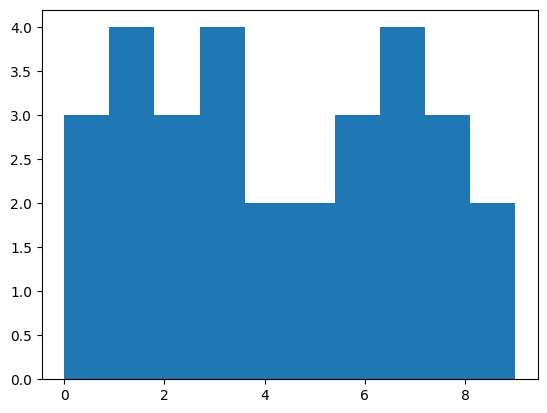

In [119]:
plt.hist(sample)
plt.show()

## Analiza stvarnih podataka

Srednja vrijednost i varijanca vrlo su važni pri analizi podataka iz stvarnog svijeta. Učitajmo podatke o igračima bejzbola s [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Koristimo paket pod nazivom [**Pandas**](https://pandas.pydata.org/) za analizu podataka. O Pandasu i radu s podacima u Pythonu razgovarat ćemo kasnije u ovom tečaju.

Izračunajmo prosječne vrijednosti za dob, visinu i težinu:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Sada se usredotočimo na visinu i izračunajmo standardnu devijaciju i varijancu:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Osim srednje vrijednosti, ima smisla pogledati medijan i kvartile. Oni se mogu vizualizirati pomoću **box plota**:


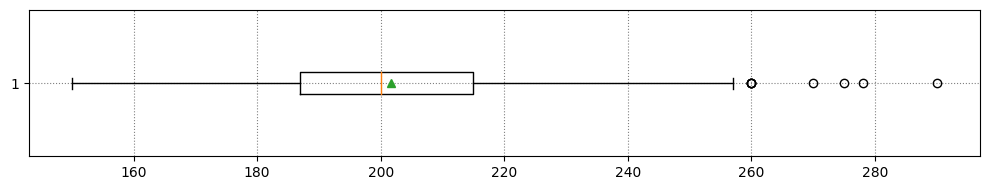

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Također možemo napraviti box plotove podskupova našeg skupa podataka, na primjer, grupirane prema ulozi igrača.


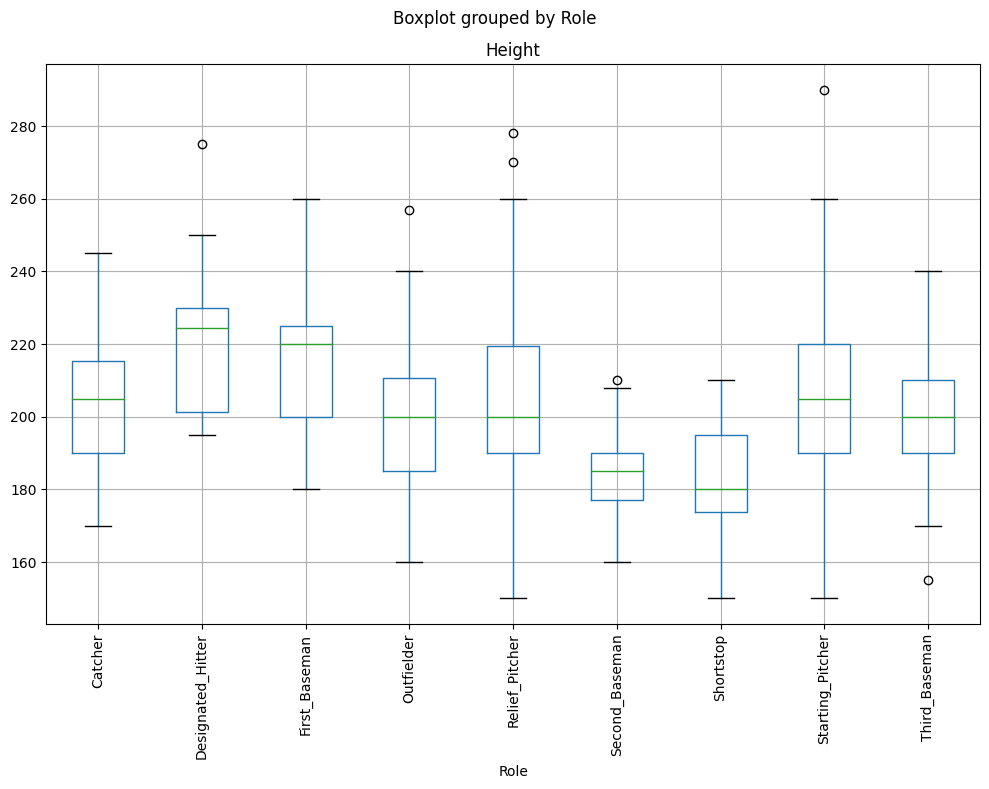

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Napomena**: Ovaj dijagram sugerira da su, u prosjeku, visine prvih bazena veće od visina drugih bazena. Kasnije ćemo naučiti kako možemo formalnije testirati ovu hipotezu i kako pokazati da su naši podaci statistički značajni kako bismo to dokazali.

Dob, visina i težina su sve kontinuirane slučajne varijable. Što mislite, kakva je njihova distribucija? Dobar način da to saznate je da nacrtate histogram vrijednosti:


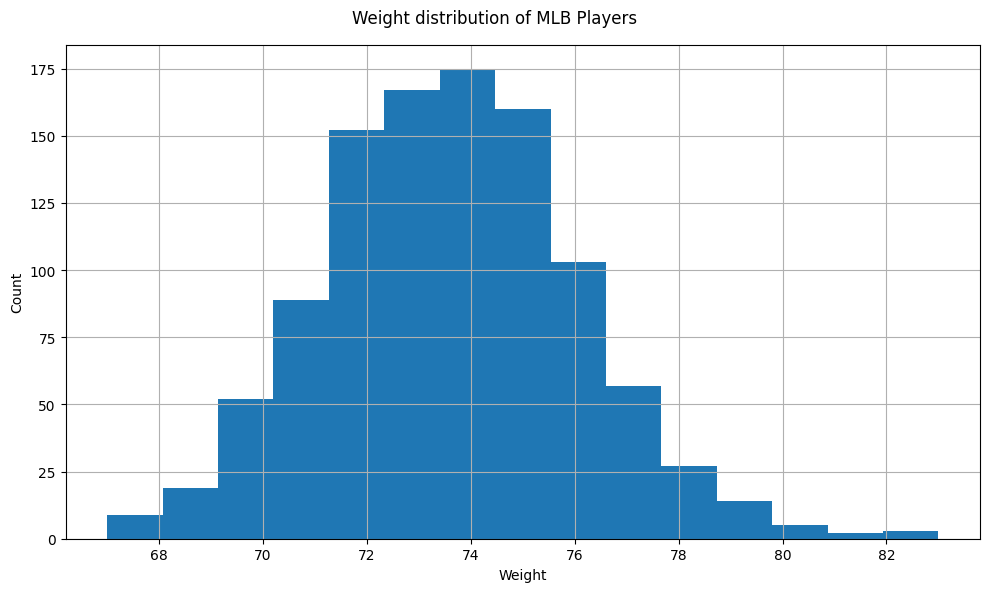

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normalna raspodjela

Stvorimo umjetni uzorak težina koji slijedi normalnu raspodjelu s istim srednjim vrijednostima i varijancom kao naši stvarni podaci:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

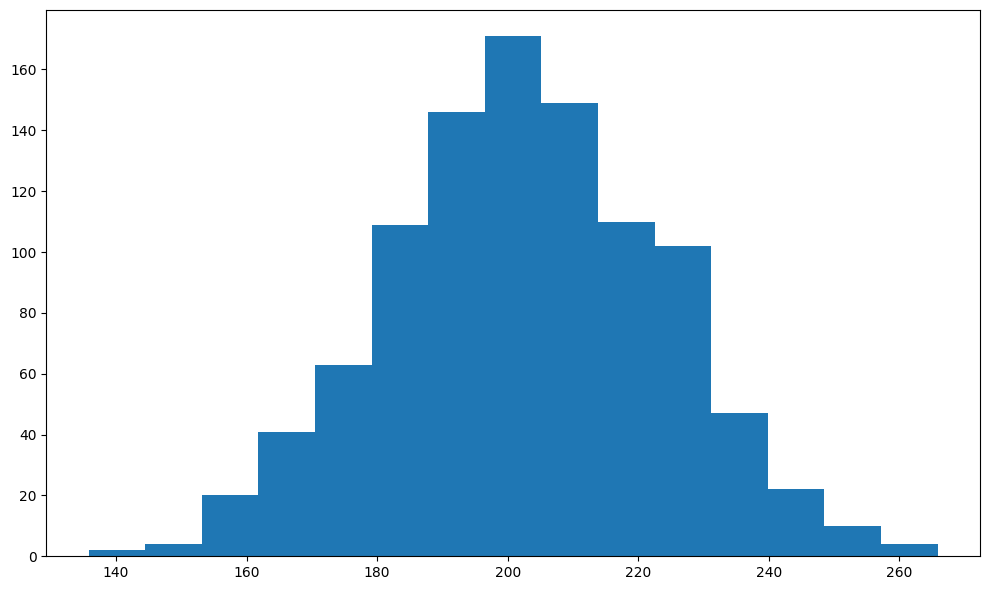

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

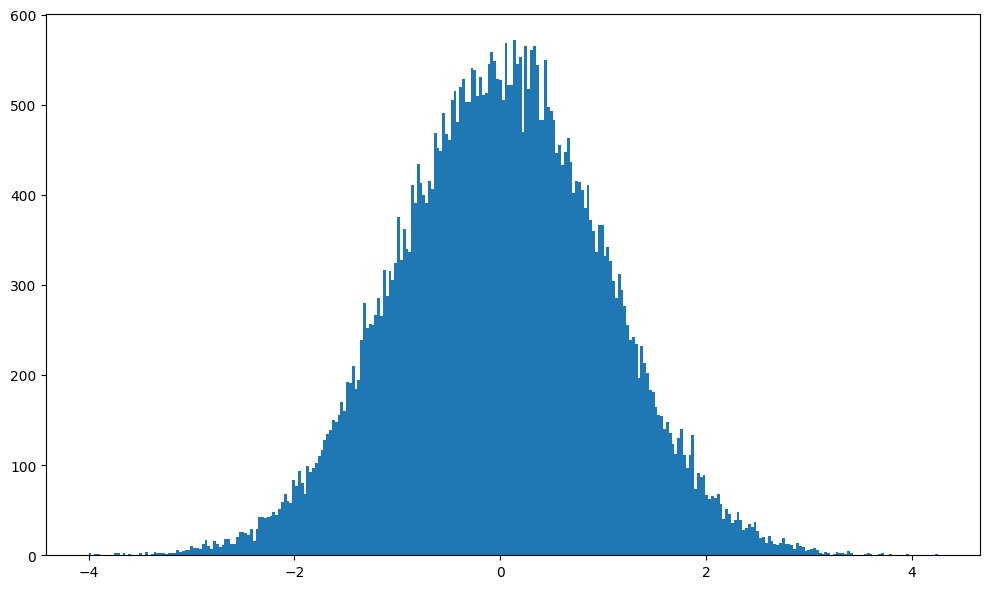

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Budući da su većina vrijednosti u stvarnom životu normalno raspodijeljene, ne bismo trebali koristiti generator uniformnih slučajnih brojeva za generiranje uzoraka podataka. Evo što se događa ako pokušamo generirati težine s uniformnom raspodjelom (generirano pomoću `np.random.rand`):


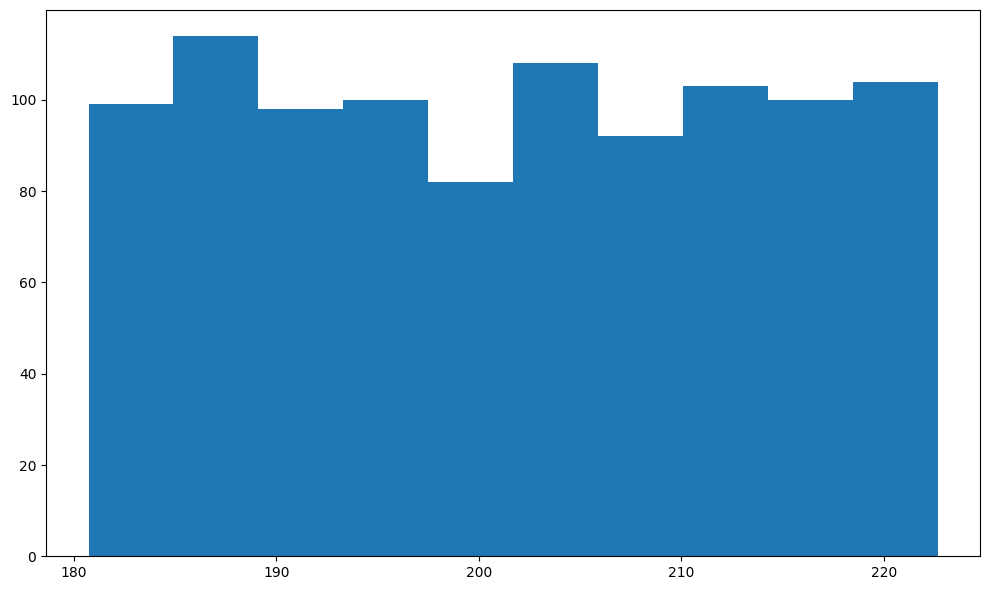

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervali pouzdanosti

Sada ćemo izračunati intervale pouzdanosti za težine i visine baseball igrača. Koristit ćemo kod [iz ove rasprave na stackoverflowu](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Testiranje hipoteza

Istražimo različite uloge u našem skupu podataka o bejzbol igračima:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Možemo vidjeti da se intervali ne preklapaju.

Statistički ispravniji način za dokazivanje hipoteze je korištenje **Studentovog t-testa**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Dvije vrijednosti koje vraća funkcija `ttest_ind` su:
* p-vrijednost može se smatrati vjerojatnošću da dvije distribucije imaju isti prosjek. U našem slučaju, ona je vrlo niska, što znači da postoje snažni dokazi koji podržavaju tvrdnju da su prvi igrači baze viši.
* t-vrijednost je srednja vrijednost normalizirane razlike prosjeka koja se koristi u t-testu, i uspoređuje se s graničnom vrijednošću za zadanu razinu pouzdanosti.


## Simulacija normalne distribucije pomoću teorema centralne granice

Pseudo-slučajni generator u Pythonu dizajniran je da nam daje uniformnu distribuciju. Ako želimo stvoriti generator za normalnu distribuciju, možemo koristiti teorem centralne granice. Da bismo dobili vrijednost koja je normalno distribuirana, jednostavno ćemo izračunati srednju vrijednost uzorka generiranog uniformno.


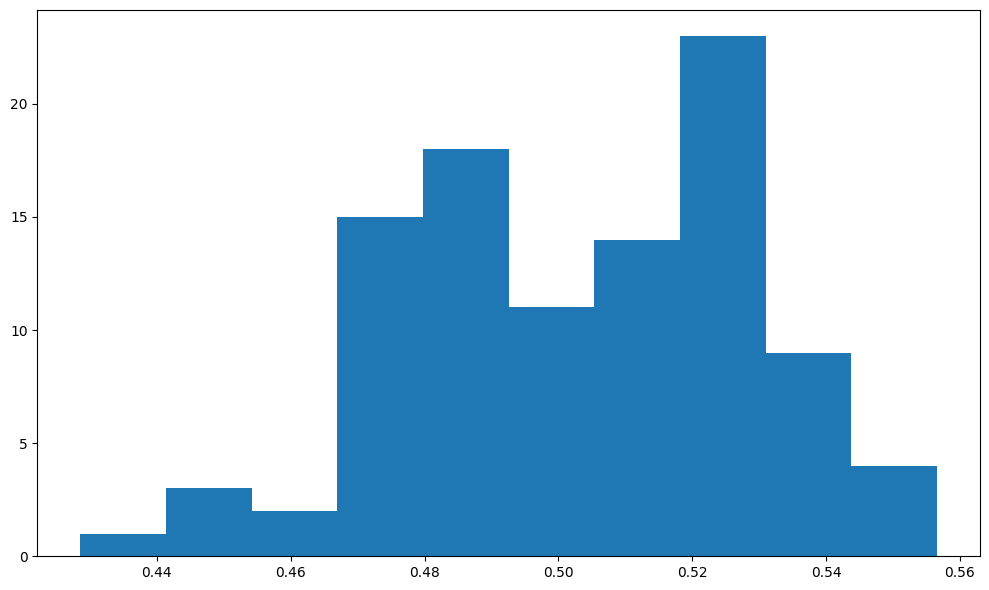

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelacija i Zla Bejzbol Korporacija

Korelacija nam omogućuje pronalaženje odnosa između nizova podataka. U našem jednostavnom primjeru, zamislimo da postoji zla bejzbol korporacija koja plaća svoje igrače prema njihovoj visini - što je igrač viši, to više novca dobiva. Pretpostavimo da postoji osnovna plaća od 1000 dolara, uz dodatni bonus od 0 do 100 dolara, ovisno o visini. Uzet ćemo stvarne igrače iz MLB-a i izračunati njihove zamišljene plaće:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Izračunajmo sada kovarijancu i korelaciju tih sekvenci. `np.cov` će nam dati takozvanu **matricu kovarijance**, koja je proširenje kovarijance na više varijabli. Element $M_{ij}$ matrice kovarijance $M$ je korelacija između ulaznih varijabli $X_i$ i $X_j$, a dijagonalne vrijednosti $M_{ii}$ su varijance $X_{i}$. Slično tome, `np.corrcoef` će nam dati **matricu korelacije**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Korelacija jednaka 1 znači da postoji jaka **linearna veza** između dvije varijable. Linearna veza može se vizualno uočiti iscrtavanjem jedne vrijednosti u odnosu na drugu:


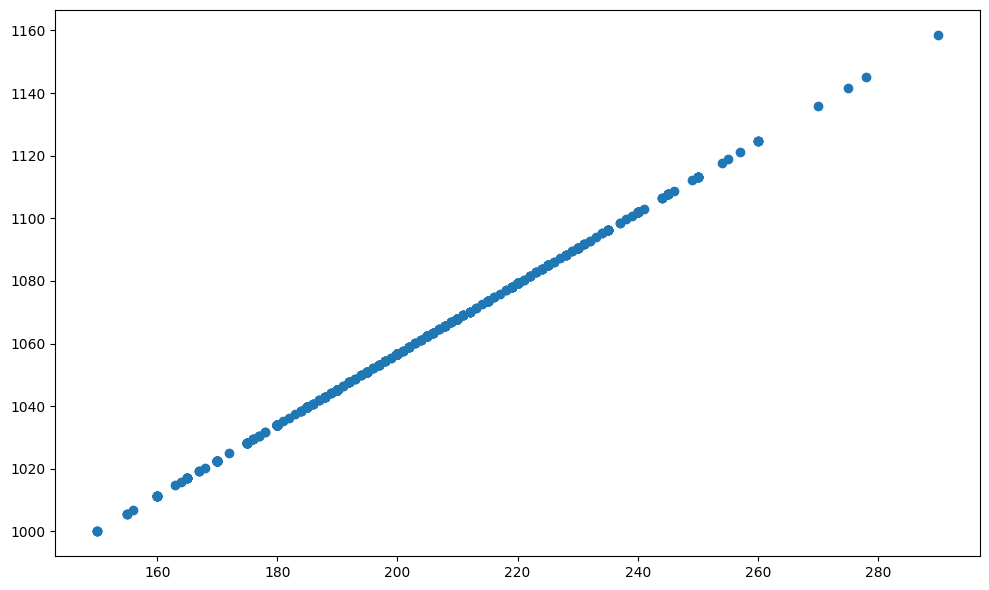

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Pogledajmo što se događa ako odnos nije linearan. Pretpostavimo da je naša korporacija odlučila sakriti očitu linearnu ovisnost između visina i plaća te uvela neku nelinearnost u formulu, poput `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


U ovom slučaju, korelacija je nešto manja, ali je i dalje prilično visoka. Sada, kako bismo vezu učinili još manje očitom, mogli bismo dodati malo dodatne nasumičnosti dodavanjem neke slučajne varijable plaći. Pogledajmo što će se dogoditi:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


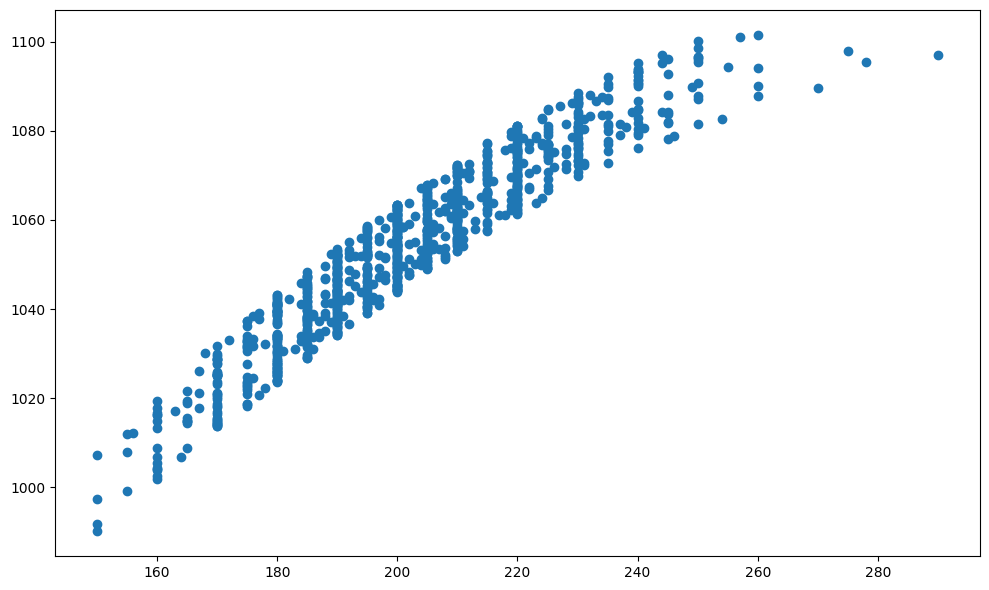

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Možete li pogoditi zašto se točkice slažu u vertikalne linije na ovaj način?

Primijetili smo povezanost između umjetno stvorenog koncepta poput plaće i promatrane varijable *visina*. Pogledajmo također jesu li dvije promatrane varijable, poput visine i težine, međusobno povezane:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Nažalost, nismo dobili nikakve rezultate - samo neke čudne `nan` vrijednosti. To je zbog činjenice da su neke vrijednosti u našoj seriji nedefinirane, predstavljene kao `nan`, što uzrokuje da rezultat operacije također bude nedefiniran. Promatrajući matricu, možemo vidjeti da je `Weight` problematičan stupac, jer je izračunata samokorelacija između vrijednosti `Height`.

> Ovaj primjer pokazuje važnost **pripreme podataka** i **čišćenja podataka**. Bez pravilno pripremljenih podataka ne možemo ništa izračunati.

Koristimo metodu `fillna` kako bismo popunili nedostajuće vrijednosti i izračunali korelaciju:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

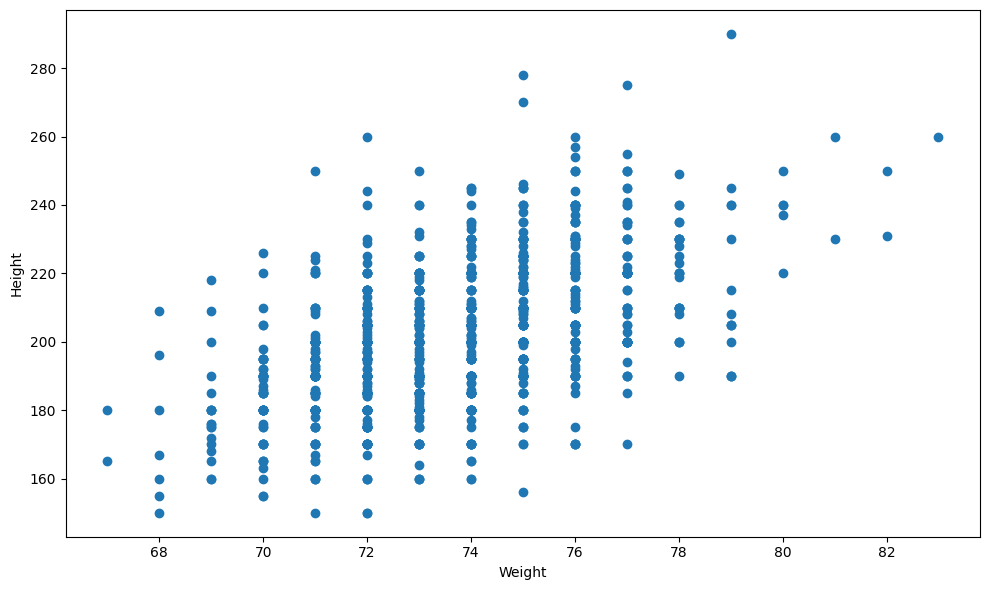

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Zaključak

U ovom bilježniku smo naučili kako izvoditi osnovne operacije na podacima za izračunavanje statističkih funkcija. Sada znamo kako koristiti pouzdane matematičke i statističke metode za dokazivanje određenih hipoteza te kako izračunati intervale pouzdanosti za proizvoljne varijable na temelju uzorka podataka.



---

**Odricanje od odgovornosti**:  
Ovaj dokument je preveden korištenjem AI usluge za prevođenje [Co-op Translator](https://github.com/Azure/co-op-translator). Iako nastojimo osigurati točnost, imajte na umu da automatski prijevodi mogu sadržavati pogreške ili netočnosti. Izvorni dokument na izvornom jeziku treba smatrati mjerodavnim izvorom. Za ključne informacije preporučuje se profesionalni prijevod od strane stručnjaka. Ne preuzimamo odgovornost za bilo kakve nesporazume ili pogrešne interpretacije proizašle iz korištenja ovog prijevoda.
